In [1]:
# Mengimpor library yang dibutuhkan
from google.colab import drive
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:

# Menghubungkan ke Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Memuat dataset
file_path = '/content/drive/My Drive/Colab Notebooks/DataMining/gk.csv'
dataset = pd.read_csv(file_path)

In [5]:
# Menampilkan 5 baris pertama dari dataset
print("5 Baris Pertama dari Dataset:")
print(dataset.head())

5 Baris Pertama dari Dataset:
         provinsi  gk.makanan.perkotaan.2015.maret  \
0            ACEH                           293697   
1  SUMATERA UTARA                           261677   
2  SUMATERA BARAT                           288410   
3            RIAU                           280361   
4           JAMBI                           297507   

   gk.makanan.perkotaan.2015.september  gk.makanan.perkotaan.2016.maret  \
0                               302128                           306243   
1                               273271                           290096   
2                               301356                           312154   
3                               288956                           292026   
4                               308379                           319954   

   gk.makanan.perkotaan.2016.september  gk.makanan.perdesaan.2015.maret  \
0                               319768                         297479.0   
1                               302027      

In [6]:
# Menampilkan informasi tentang dataset
print("\nInformasi Dataset:")
print(dataset.info())


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Columns: 157 entries, provinsi to gk.total.perdesaanperkotaan.2022.september
dtypes: float64(60), int64(96), object(1)
memory usage: 43.1+ KB
None


In [7]:
# Mengganti nilai '?' dengan NaN
dataset.replace("?", np.nan, inplace=True)


In [8]:
# Memeriksa nilai yang hilang
print("\nPersentase Nilai yang Hilang di Setiap Kolom:")
print(dataset.isnull().mean() * 100)


Persentase Nilai yang Hilang di Setiap Kolom:
provinsi                                      0.000000
gk.makanan.perkotaan.2015.maret               0.000000
gk.makanan.perkotaan.2015.september           0.000000
gk.makanan.perkotaan.2016.maret               0.000000
gk.makanan.perkotaan.2016.september           0.000000
                                                ...   
gk.total.perdesaan.2022.september             2.857143
gk.total.perdesaanperkotaan.2021.maret        0.000000
gk.total.perdesaanperkotaan.2021.september    0.000000
gk.total.perdesaanperkotaan.2022.maret        0.000000
gk.total.perdesaanperkotaan.2022.september    0.000000
Length: 157, dtype: float64


In [9]:
# Menghapus duplikat jika ada
dataset = dataset.drop_duplicates()
print("\nJumlah Baris setelah Menghapus Duplikat:", dataset.shape[0])


Jumlah Baris setelah Menghapus Duplikat: 35


In [11]:
# Tampilkan semua nama kolom yang ada
print("\nNama Kolom dalam Dataset:")
print(dataset.columns)


Nama Kolom dalam Dataset:
Index(['provinsi', 'gk.makanan.perkotaan.2015.maret',
       'gk.makanan.perkotaan.2015.september',
       'gk.makanan.perkotaan.2016.maret',
       'gk.makanan.perkotaan.2016.september',
       'gk.makanan.perdesaan.2015.maret',
       'gk.makanan.perdesaan.2015.september',
       'gk.makanan.perdesaan.2016.maret',
       'gk.makanan.perdesaan.2016.september',
       'gk.makanan.perdesaanperkotaan.2015.maret',
       ...
       'gk.total.perkotaan.2022.maret', 'gk.total.perkotaan.2022.september',
       'gk.total.perdesaan.2021.maret', 'gk.total.perdesaan.2021.september',
       'gk.total.perdesaan.2022.maret', 'gk.total.perdesaan.2022.september',
       'gk.total.perdesaanperkotaan.2021.maret',
       'gk.total.perdesaanperkotaan.2021.september',
       'gk.total.perdesaanperkotaan.2022.maret',
       'gk.total.perdesaanperkotaan.2022.september'],
      dtype='object', length=157)


In [16]:
dataset.columns.tolist()

['provinsi',
 'gk.makanan.perkotaan.2015.maret',
 'gk.makanan.perkotaan.2015.september',
 'gk.makanan.perkotaan.2016.maret',
 'gk.makanan.perkotaan.2016.september',
 'gk.makanan.perdesaan.2015.maret',
 'gk.makanan.perdesaan.2015.september',
 'gk.makanan.perdesaan.2016.maret',
 'gk.makanan.perdesaan.2016.september',
 'gk.makanan.perdesaanperkotaan.2015.maret',
 'gk.makanan.perdesaanperkotaan.2015.september',
 'gk.makanan.perdesaanperkotaan.2016.maret',
 'gk.makanan.perdesaanperkotaan.2016.september',
 'gk.makanan.perkotaan.2017.maret',
 'gk.makanan.perkotaan.2017.september',
 'gk.makanan.perkotaan.2018.maret',
 'gk.makanan.perkotaan.2018.september',
 'gk.makanan.perdesaan.2017.maret',
 'gk.makanan.perdesaan.2017.september',
 'gk.makanan.perdesaan.2018.maret',
 'gk.makanan.perdesaan.2018.september',
 'gk.makanan.perdesaanperkotaan.2017.maret',
 'gk.makanan.perdesaanperkotaan.2017.september',
 'gk.makanan.perdesaanperkotaan.2018.maret',
 'gk.makanan.perdesaanperkotaan.2018.september',
 'g

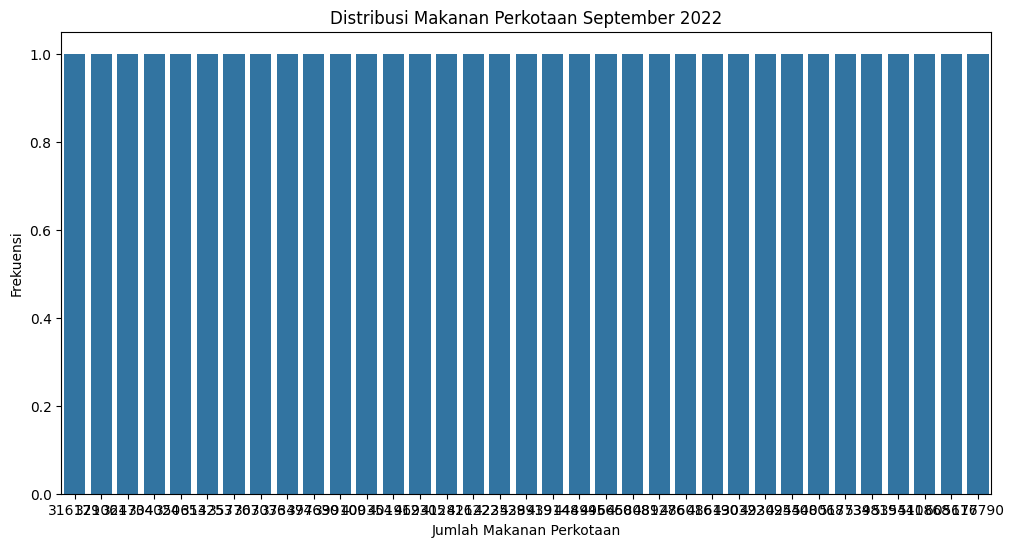

In [17]:
# Menggambarkan distribusi data untuk kolom tertentu
plt.figure(figsize=(12, 6))
sns.countplot(x='gk.makanan.perkotaan.2022.september', data=dataset)  # Ganti dengan nama kolom yang valid
plt.title('Distribusi Makanan Perkotaan September 2022')
plt.xlabel('Jumlah Makanan Perkotaan')
plt.ylabel('Frekuensi')
plt.show()

In [18]:
# Mempersiapkan data untuk model
# Ganti 'target_column' dengan nama kolom target yang ingin diprediksi
X = dataset.drop('gk.makanan.perkotaan.2022.september', axis=1)  # Mengganti 'target_column' dengan nama kolom target
y = dataset['gk.makanan.perkotaan.2022.september']  # Mengganti 'target_column' dengan nama kolom target

In [19]:
# Pembagian data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Menentukan fitur dan target
X = dataset.drop(columns=['gk.makanan.perkotaan.2022.september'])  # Fitur
y = dataset['gk.makanan.perkotaan.2022.september']  # Target

In [28]:
# Memisahkan data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Cek tipe data dan jumlah NaN
print("Tipe data fitur (X_train):")
print(X_train.dtypes)

print("\nTipe data target (y_train):")
print(y_train.dtypes)

print("\nJumlah nilai NaN di X_train:")
print(X_train.isna().sum())

print("\nJumlah nilai NaN di y_train:")
print(y_train.isna().sum())

Tipe data fitur (X_train):
provinsi                                       object
gk.makanan.perkotaan.2015.maret                 int64
gk.makanan.perkotaan.2015.september             int64
gk.makanan.perkotaan.2016.maret                 int64
gk.makanan.perkotaan.2016.september             int64
                                               ...   
gk.total.perdesaan.2022.september             float64
gk.total.perdesaanperkotaan.2021.maret          int64
gk.total.perdesaanperkotaan.2021.september      int64
gk.total.perdesaanperkotaan.2022.maret          int64
gk.total.perdesaanperkotaan.2022.september      int64
Length: 156, dtype: object

Tipe data target (y_train):
int64

Jumlah nilai NaN di X_train:
provinsi                                      0
gk.makanan.perkotaan.2015.maret               0
gk.makanan.perkotaan.2015.september           0
gk.makanan.perkotaan.2016.maret               0
gk.makanan.perkotaan.2016.september           0
                                             ..

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
# Jika ada kolom string di X_train, lakukan encoding
for column in X_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_train[column] = le.fit_transform(X_train[column])

In [36]:
# Lakukan hal yang sama untuk y_train jika perlu
if y_train.dtype == 'object':
    le = LabelEncoder()
    y_train = le.fit_transform(y_train)

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
# Melatih model menggunakan Decision Tree
try:
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)
    print("Model berhasil dilatih.")
except ValueError as e:
    print("Terjadi kesalahan saat melatih model:", e)

Model berhasil dilatih.
